### Task Is To Build Naive Bayes And CNN Models For Crop & Grass Classification

# Dataset set up

In [1]:
import warnings
warnings.filterwarnings('ignore')

!wget https://www.dropbox.com/s/i32nvysg1r4l6b1/crops_and_grass.zip

--2023-06-28 11:54:46--  https://www.dropbox.com/s/i32nvysg1r4l6b1/crops_and_grass.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/i32nvysg1r4l6b1/crops_and_grass.zip [following]
--2023-06-28 11:54:46--  https://www.dropbox.com/s/raw/i32nvysg1r4l6b1/crops_and_grass.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84293b07c50e2a64503a7493fc.dl.dropboxusercontent.com/cd/0/inline/B-2H4UpjHspH3UtWMnScuBekA8OKiazo2UHuKU566iOR3ADDoxsNqjVvteGs9oviBYYSMVFnSTTZ_JGkC1T9hugaai1pqC4XTCpHCWj1pQTErEGkho6SqQT4hYd_GwD1IJspIpYVM7rM6OtNnQ0nocx_z_sNvZc1QfJEmLIqp2qZQA/file# [following]
--2023-06-28 11:54:47--  https://uc84293b07c50e2a64503a7493fc.dl.dropboxusercontent.com/cd/0/inline/B-2H4UpjHspH3UtWMnScuBekA8OKiazo2UHuKU566iOR3ADDoxsNqjVv

In [2]:
!unzip crops_and_grass.zip

Archive:  crops_and_grass.zip
   creating: crops_and_grass/
   creating: crops_and_grass/cassava/
  inflating: crops_and_grass/cassava/cassava (1).jpg  
  inflating: crops_and_grass/cassava/cassava (10).jpg  
  inflating: crops_and_grass/cassava/cassava (100).jpg  
  inflating: crops_and_grass/cassava/cassava (101).jpg  
  inflating: crops_and_grass/cassava/cassava (102).jpg  
  inflating: crops_and_grass/cassava/cassava (103).jpg  
  inflating: crops_and_grass/cassava/cassava (104).jpg  
  inflating: crops_and_grass/cassava/cassava (105).jpg  
  inflating: crops_and_grass/cassava/cassava (11).jpg  
  inflating: crops_and_grass/cassava/cassava (111).jpg  
  inflating: crops_and_grass/cassava/cassava (112).jpg  
  inflating: crops_and_grass/cassava/cassava (113).jpg  
  inflating: crops_and_grass/cassava/cassava (114).jpg  
  inflating: crops_and_grass/cassava/cassava (115).jpg  
  inflating: crops_and_grass/cassava/cassava (116).jpg  
  inflating: crops_and_grass/cassava/cassava (117).

## process dataset

In [3]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [4]:
try:
  os.makedirs("./train")
  os.makedirs("./test")
except Exception as e:
  print(e)

cassava = len(os.listdir('./crops_and_grass/cassava'))
maize = len(os.listdir('./crops_and_grass/maize'))
sugarcane = len(os.listdir('./crops_and_grass/sugarcane'))
grass = len(os.listdir('./crops_and_grass/grass'))

print(f"{cassava} Cassava Images")
print(f"{maize} Maize Images")
print(f"{sugarcane} SugarCane Images")
print(f"{grass} Grass Images")


271 Cassava Images
276 Maize Images
101 SugarCane Images
272 Grass Images


In [5]:
def populate_for_class():
  data_test = []
  data_train = []
  classes = [
      {
          "dir": 'crops_and_grass/cassava',
          "label": 0
      },
      {
          "dir": 'crops_and_grass/grass',
          "label": 1
      },
      {
          "dir": 'crops_and_grass/maize',
          "label": 2
      },
      {
          "dir": 'crops_and_grass/sugarcane',
          "label": 3
      }
  ]
  for dataset_class in classes:
    label = dataset_class['label']
    src = dataset_class['dir']
    images = os.listdir(src)
    split = int(len(images) * 0.85)
    for i, img in enumerate(images):
      if i < split:
        shutil.copy(os.path.join(src, img), os.path.join(f"train/", img))
        data_train.append([os.path.join(f"train/", img), label])
      else:
        shutil.copy(os.path.join(src, img), os.path.join(f"test/", img))
        data_test.append([os.path.join(f"test/", img), label])

  return data_train, data_test

data_train, data_test = populate_for_class()

In [6]:
# Save train labels to csv file.
data_train = pd.DataFrame(data_train, columns=['image_path', 'label'])
data_train.to_csv('train_labels.csv')
data_train.head()

,image_path,label
0,train/cassava (233).jpg,0
1,train/cassava (297).jpg,0
2,train/cassava (138).jpg,0
3,train/cassava (284).jpg,0
4,train/cassava (219).jpg,0


In [7]:
# Save train labels to csv file.
data_test = pd.DataFrame(data_test, columns=['image_path', 'label'])
data_test.to_csv('test_labels.csv')
data_test.tail()

,image_path,label
135,test/sugarcane (10).jpg,3
136,test/sugarcane (11).jpg,3
137,test/sugarcane (8).jpg,3
138,test/sugarcane (54).jpg,3
139,test/sugarcane (71).jpg,3


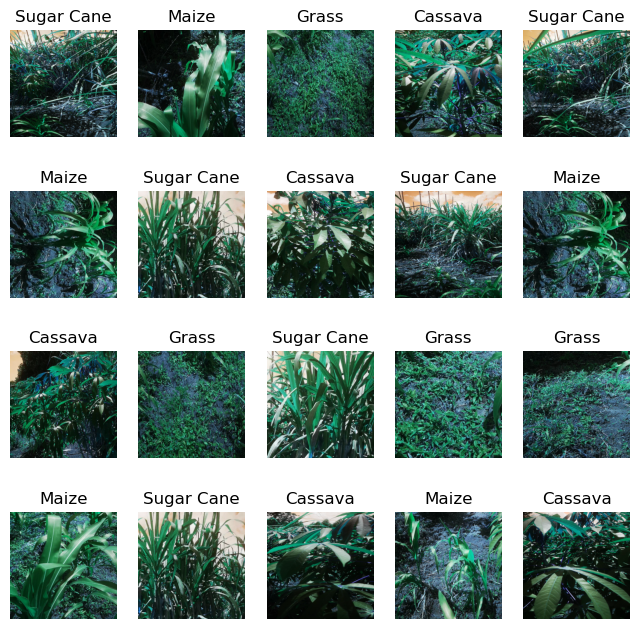

In [8]:
labels_map = {
    0: "Cassava",
    1: "Grass",
    2: "Maize",
    3: "Sugar Cane"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 4
for i in range(1, 21):
    sample_idx = random.randint(0, len(data_train['image_path']))
    img = cv2.imread(data_train.iloc[sample_idx].image_path)
    img = cv2.resize(img, (700, 700))
    label = data_train.iloc[sample_idx].label
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

# Performing Edge Detection 

In [9]:
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [10]:
import cv2
import matplotlib.pyplot as plt

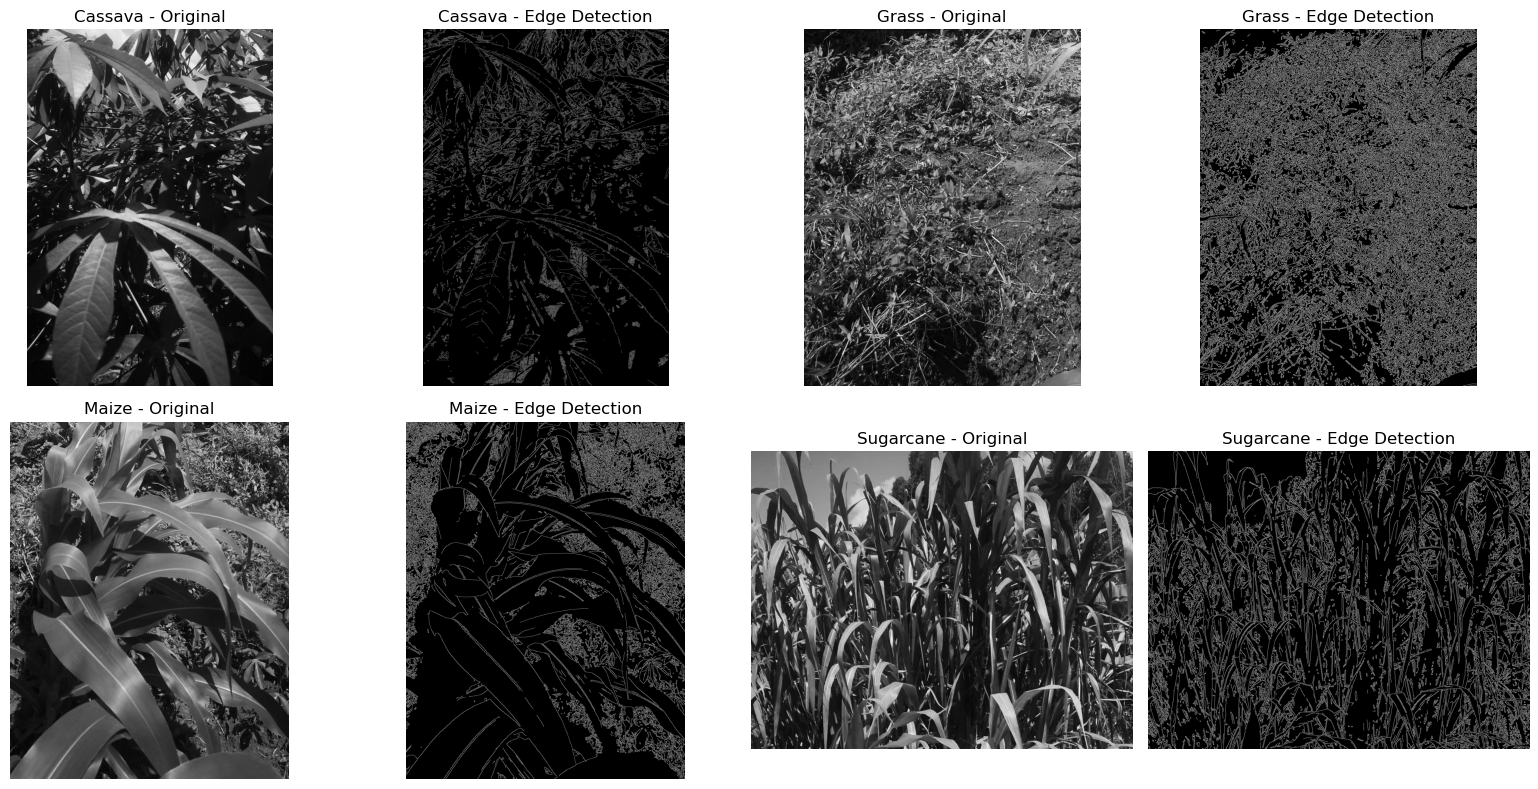

In [11]:
import cv2
import matplotlib.pyplot as plt

def auto_canny_edge_detection(image, sigma=0.33):
    # Apply Gaussian filter to the image
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Compute median of the blurred image
    md = np.median(blurred)

    # Calculate lower and upper thresholds using the sigma value
    lower_value = int(max(0, (1.0 - sigma) * md))
    upper_value = int(min(255, (1.0 + sigma) * md))

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, lower_value, upper_value)

    # Perform maximum suppression
    suppressed_edges = non_max_suppression(edges)

    return suppressed_edges

def non_max_suppression(edges):
    # Perform non-maximum suppression on the edges
    edges_copy = edges.copy()
    contours, _ = cv2.findContours(edges_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        edges_copy[y:y+h, x:x+w] = cv2.dilate(edges_copy[y:y+h, x:x+w], None)
        edges_copy[edges_copy != edges] = 0

    return edges_copy


# Define the image paths for each category
cassava_path = "/kaggle/working/train/cassava (219).jpg"
grass_path = "/kaggle/working/train/grass  (242).jpg"
maize_path = "/kaggle/working/train/maize  (16).jpg"
sugarcane_path = "/kaggle/working/train/sugarcane (9).jpg"

# Read and preprocess the images
cassava_image = cv2.imread(cassava_path, cv2.IMREAD_GRAYSCALE)
grass_image = cv2.imread(grass_path, cv2.IMREAD_GRAYSCALE)
maize_image = cv2.imread(maize_path, cv2.IMREAD_GRAYSCALE)
sugarcane_image = cv2.imread(sugarcane_path, cv2.IMREAD_GRAYSCALE)

# Apply auto_canny_edge_detection to the images
cassava_edges = auto_canny_edge_detection(cassava_image)
grass_edges = auto_canny_edge_detection(grass_image)
maize_edges = auto_canny_edge_detection(maize_image)
sugarcane_edges = auto_canny_edge_detection(sugarcane_image)

# Display the original images and edge detection results
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(cassava_image, cmap='gray')
axs[0, 0].set_title('Cassava - Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(cassava_edges, cmap='gray')
axs[0, 1].set_title('Cassava - Edge Detection')
axs[0, 1].axis('off')

axs[0, 2].imshow(grass_image, cmap='gray')
axs[0, 2].set_title('Grass - Original')
axs[0, 2].axis('off')

axs[0, 3].imshow(grass_edges, cmap='gray')
axs[0, 3].set_title('Grass - Edge Detection')
axs[0, 3].axis('off')

axs[1, 0].imshow(maize_image, cmap='gray')
axs[1, 0].set_title('Maize - Original')
axs[1, 0].axis('off')

axs[1, 1].imshow(maize_edges, cmap='gray')
axs[1, 1].set_title('Maize - Edge Detection')
axs[1, 1].axis('off')

axs[1, 2].imshow(sugarcane_image, cmap='gray')
axs[1, 2].set_title('Sugarcane - Original')
axs[1, 2].axis('off')

axs[1, 3].imshow(sugarcane_edges, cmap='gray')
axs[1, 3].set_title('Sugarcane - Edge Detection')
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()


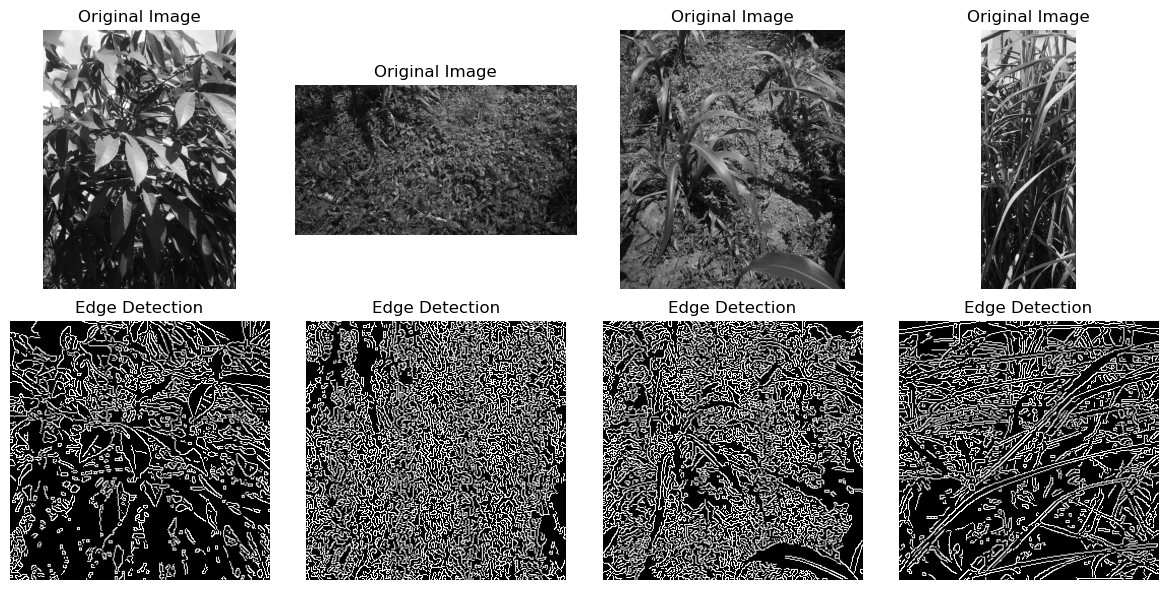

In [12]:
import cv2
import matplotlib.pyplot as plt

def auto_canny_edge_detection(image, sigma=0.33):
    # Apply Gaussian filter to the image
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Compute median of the blurred image
    md = np.median(blurred)

    # Calculate lower and upper thresholds using the sigma value
    lower_value = int(max(0, (1.0 - sigma) * md))
    upper_value = int(min(255, (1.0 + sigma) * md))

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, lower_value, upper_value)

    # Perform maximum suppression
    suppressed_edges = non_max_suppression(edges)

    return suppressed_edges

def non_max_suppression(edges):
    # Perform non-maximum suppression on the edges
    edges_copy = edges.copy()
    contours, _ = cv2.findContours(edges_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        edges_copy[y:y+h, x:x+w] = cv2.dilate(edges_copy[y:y+h, x:x+w], None)
        edges_copy[edges_copy != edges] = 0

    return edges_copy


# Read and preprocess images
image_paths = ['/kaggle/input/crops-grass-data/crops_and_grass/cassava/cassava (1).jpg', '/kaggle/input/crops-grass-data/crops_and_grass/grass/grass  (102).jpg', '/kaggle/input/crops-grass-data/crops_and_grass/maize/maize  (121).jpg', '/kaggle/input/crops-grass-data/crops_and_grass/sugarcane/sugarcane (102).jpg']
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
processed_images = [cv2.resize(image, (256, 256)) for image in images]

# Apply auto_canny_edge_detection to images
edges = [auto_canny_edge_detection(image) for image in processed_images]

# Display original images and edge detection results
num_images = len(image_paths)
fig, axs = plt.subplots(2, num_images, figsize=(12, 6))
for i in range(num_images):
    axs[0, i].imshow(images[i], cmap='gray')
    axs[0, i].set_title('Original Image')
    axs[0, i].axis('off')

    axs[1, i].imshow(edges[i], cmap='gray')
    axs[1, i].set_title('Edge Detection')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [13]:
import cv2
import numpy as np
from sklearn.naive_bayes import GaussianNB

labels = data_train['label']
image_paths = data_train['image_path']

# Function for auto Canny edge detection
def auto_canny_edge_detection(image, sigma=0.33):
    md = np.median(image)
    lower_value = int(max(0, (1.0 - sigma) * md))
    upper_value = int(min(255, (1.0 + sigma) * md))
    return cv2.Canny(image, lower_value, upper_value)

# Initialize empty lists to store the feature vectors and labels
feature_vectors = []
extracted_labels = []

# Extract Image features (Edges + Histogram)
for path, label in zip(image_paths, labels):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (700, 700))

    # Extract edges using auto_canny_edge_detection
    edges = auto_canny_edge_detection(image)
    edge_features = edges.flatten()

    # Extract histogram features
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_features = hist.flatten()

    # Combine edge and histogram features into a single feature vector
    combined_features = np.concatenate((edge_features, hist_features), axis=0)

    feature_vectors.append(combined_features)
    extracted_labels.append(label)

feature_vectors = np.array(feature_vectors)
extracted_labels = np.array(extracted_labels)

# Train model
naive_bayes = GaussianNB()
naive_bayes.fit(feature_vectors, labels)

GaussianNB()

In [14]:
from sklearn.utils import shuffle

data_test = shuffle(data_test)
labels_test = data_test['label']
image_paths_test = data_test['image_path']

output_labels = []

correct = 0
for path, label in zip(image_paths_test, labels_test):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (700, 700))

    # Extract edges using auto_canny_edge_detection function
    edges = auto_canny_edge_detection(image)
    edge_features = edges.flatten()

    # Extract histogram features
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_features = hist.flatten()

    # Combine edge and histogram features into a single feature vector
    combined_features = np.concatenate((edge_features, hist_features), axis=0)

    if len(combined_features) > 0:
        # Predict label using the trained Naïve Bayes classifier
        image_label = naive_bayes.predict([combined_features])
        output_labels.append(image_label)
        if image_label == label:
            correct += 1

In [15]:
# Evaluate model
accuracy = accuracy_score(np.array(labels_test), np.array(output_labels))
print("Accuracy:", accuracy)

Accuracy: 0.7


In [16]:
print(classification_report(np.array(labels_test), np.array(output_labels)))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66        41
           1       0.95      0.93      0.94        41
           2       0.56      0.48      0.51        42
           3       1.00      0.50      0.67        16

    accuracy                           0.70       140
   macro avg       0.77      0.67      0.69       140
weighted avg       0.73      0.70      0.70       140



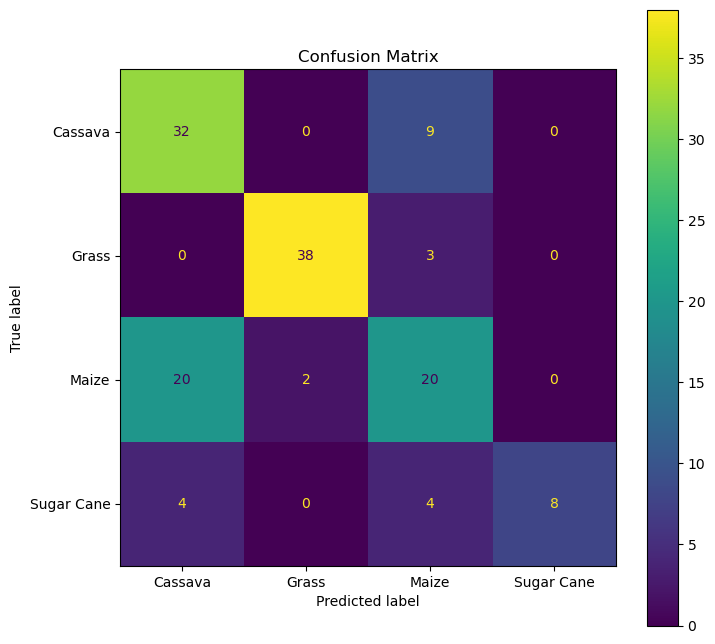

In [17]:
matrix = confusion_matrix(np.array(labels_test), np.array(output_labels))
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Cassava', 'Grass', 'Maize', 'Sugar Cane'])

plt.figure(figsize=(8,8))
plt.title(f"Confusion Matrix")
cm_display.plot(ax=plt.subplot())
plt.show()

# Naive Bayes Model

In [18]:
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### Model Train

In [19]:
labels = data_train['label']
image_paths = data_train['image_path']

feature_vectors = []
# Extract Image features
for path in image_paths:
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (700, 700))
    image = hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    feature_vectors.append(image.flatten())

feature_vectors = np.array(feature_vectors)
labels = np.array(labels)

# Train model
naive_bayes = GaussianNB()
naive_bayes.fit(feature_vectors, labels)

GaussianNB()

### Model Test

In [20]:
#testing
data_test = shuffle(data_test)
labels_test = data_test['label']
image_paths_test = data_test['image_path']
sift = cv2.SIFT_create()

feature_vectors = []
for path, label in zip(image_paths_test, labels_test):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (700, 700))
    image = hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    feature_vectors.append(image.flatten())

output_labels = naive_bayes.predict(np.array(feature_vectors))

### Model Evaluation

In [21]:
# Evaluate model
accuracy = accuracy_score(np.array(labels_test), np.array(output_labels))
print("Accuracy:", accuracy)


Accuracy: 0.7714285714285715


In [22]:
print(classification_report(np.array(labels_test), np.array(output_labels)))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        41
           1       0.70      0.95      0.80        41
           2       0.76      0.67      0.71        42
           3       0.82      0.88      0.85        16

    accuracy                           0.77       140
   macro avg       0.79      0.79      0.78       140
weighted avg       0.79      0.77      0.77       140



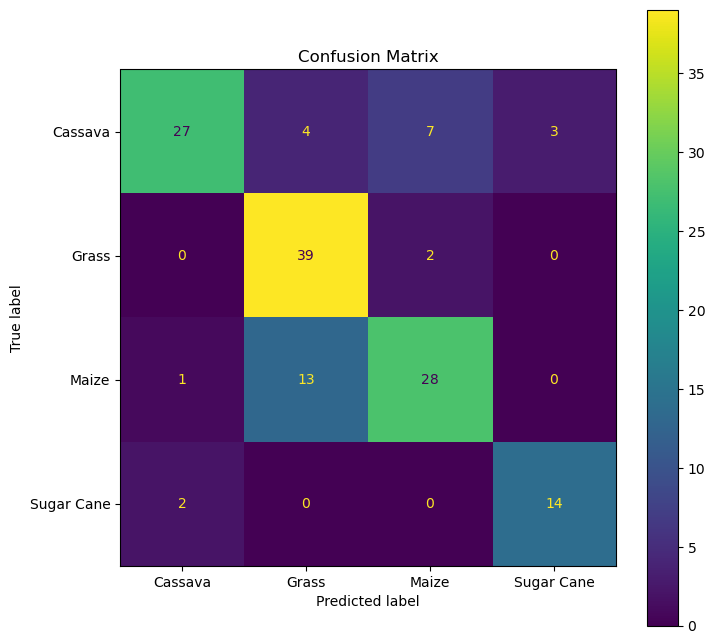

In [23]:
matrix = confusion_matrix(np.array(labels_test), np.array(output_labels))
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Cassava', 'Grass', 'Maize', 'Sugar Cane'])

plt.figure(figsize=(8,8))
plt.title(f"Confusion Matrix")
cm_display.plot(ax=plt.subplot())
plt.show()